<a href="https://colab.research.google.com/github/Vigneshprabhu078/Machine_Learning_Projects/blob/main/5_Loan_Status_Prediction_System_Using_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Status Prediction using Support Vector Machine**   - Vignesh Prabhu

In the realm of financial services, the ability to accurately predict loan approval outcomes is crucial for mitigating risks and improving decision-making processes. Traditional methods often rely on subjective assessments, which can lead to inconsistencies and biases. In contrast, machine learning offers a data-driven approach to analyze applicant information and predict whether a loan application should be approved or denied. This project focuses on developing and deploying a predictive model that leverages machine learning algorithms to assess the likelihood of loan approval based on various applicant characteristics. By integrating advanced analytics with financial decision-making, this endeavor aims to enhance efficiency, reduce risk exposure, and foster fairer lending practices in the financial sector.

##**Import Dependencies**

In [42]:
import pandas as pd  #making NP arrays
import numpy as np   # DataFrame
import seaborn as sns #plot
import matplotlib.pyplot as plt #plot
from sklearn.model_selection import train_test_split #split data
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data Collection and Pre-Processing**

In [43]:
#loading data to Pandas Dataframe
loan_data=pd.read_csv('/content/Loan Data.csv')

In [44]:
# To View Top 5 data's in dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
# To check Rows and Columns
loan_data.shape

(614, 13)

In [46]:
#To statistical data
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
#To check Null values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
#dropping Missing Values
loan_data=loan_data.dropna()

**Label Encoding**

In [49]:
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-49-e97d6e137010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [50]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [51]:
#Depentent column values
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [52]:
#replacing the Value of 3+ and 4
loan_data=loan_data.replace(to_replace='3+',value=4)


**Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

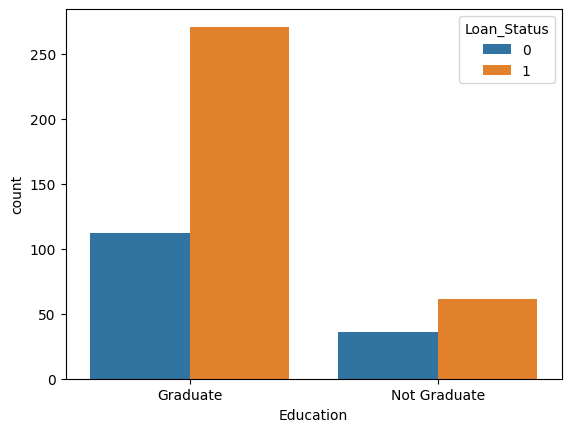

In [53]:
#plot
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)  #Education and Loan Status

In [54]:
loan_data['Married'].value_counts() #Married and Loan Status

Married
Yes    311
No     169
Name: count, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

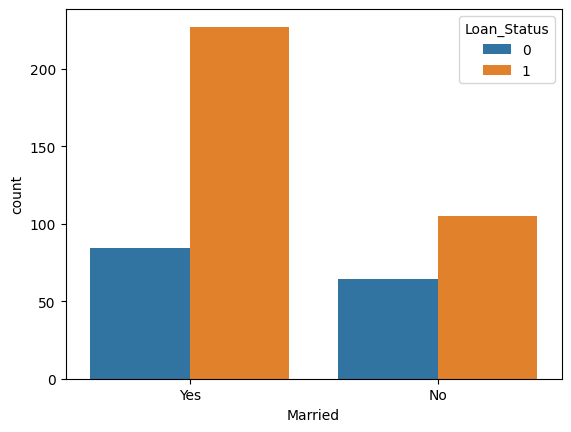

In [55]:
# plot for marital status and Loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Self_Employed', ylabel='count'>

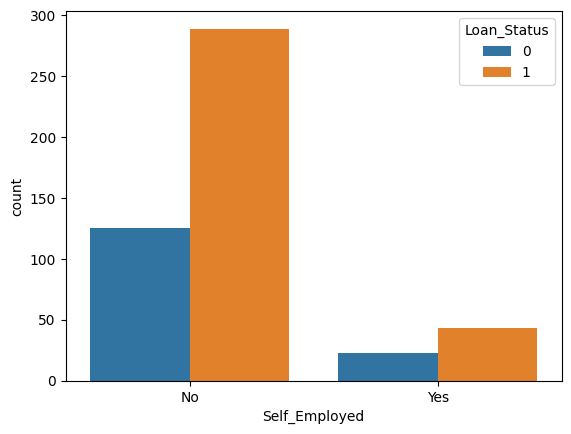

In [56]:
#plot for self employed
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data)


In [57]:
#convert Categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                   'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':1}}, inplace=True)

In [58]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


**Separating Data and labels**

In [59]:
X=loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_data['Loan_Status']

In [60]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Train Test Split**

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


## **Model Building**

**Support Vector Machine 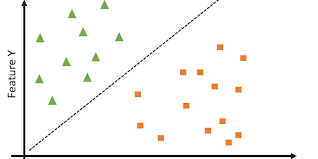**

In [63]:
svm_model=svm.SVC(kernel='linear') #Support Vector Machine , SVC - support vector classifier

In [64]:
training_data=svm_model.fit(X_train,Y_train)  #training data

**Model Evaluation**

In [65]:
#Accuracy Score
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.7939814814814815


In [66]:
# Accuracy For test data
X_test_prediction=svm_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on test data :  0.8333333333333334


**Predictive System**

In [68]:
input_data = (1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2)

#Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
  print("Loan is Not Approved")
else:
  print("Loan is Approved")





[1]
Loan is Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Thank You !**

This project demonstrates the effectiveness of machine learning in predicting loan approval outcomes based on applicant data. By deploying a robust model, we enhance decision-making efficiency and reduce risk, fostering fairer lending practices. Continuous model monitoring and adaptation are crucial for maintaining effectiveness in dynamic financial environments, highlighting the transformative potential of machine learning in financial services.